## Project Guidance and Instructions

Milestone 3 allows you to apply the knowledge you gained in Unit 3 of the course. In this milestone, you need to prepare the data for modeling as well as build an initial model that you will need to refine for Milestone 4.

For Milestone 3 you should

- prepare the data via cleaning, normalization, encoding, etc.
- generate and evaluate a working time series model.

# Problem

Is there a feature or set of features that would yield to a higher home price for the King County Region?

# Abstract:

In this analysis the production trends for the Icecream production in the state of California will be explored.

The analysis is is divided the following way:

### First look at the data:
- **Loading Data**

### Analysis: Icecream Production in California:
- **STL Decomposition of the Variable**
- **Forcasting Time Series**
    - Linear Regression Model
    - ARIMA Model
    - Comparisons

### Summary/conclusions:

In [1]:
#Loading libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as nr
import scipy.stats as ss
import statsmodels.tsa.seasonal as sts
import statsmodels.graphics.tsaplots as splt
import statsmodels.tsa.arima_process as arima
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [2]:
#Load File
filename = 'kc_house_data.csv'
house_df = pd.read_csv(filename)

# Data cleaning:

In [3]:
#Removing outliers based on Price:
LimitHi = np.mean(house_df['price']) + 1*np.std(house_df['price']) #Higher Limit for each of the numeric attributes
LimitLo = np.mean(house_df['price']) - 1*np.std(house_df['price']) #Lower Limit for each of the numeric attributes
FlagBad = (house_df['price'] < LimitLo) | (house_df['price'] > LimitHi) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood]

#Some cleaning of the data (outliers) will be removed since we are interested in the typical market for the region.
FlagBad = (house_df['bedrooms'] > 8) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

FlagBad = (house_df['bathrooms'] > 6) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

FlagBad = (house_df['sqft_lot'] > 50000) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

In [4]:
house_df = house_df.dropna()

In [5]:
#Transforming the variable date into DateTime Variable
house_df.loc[:, 'date'] = pd.to_datetime(house_df.loc[:, 'date'])
#house_df.set_index('date', inplace = True)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


In [6]:
#Column price from str to numeric (int64)
house_df['price'] = pd.to_numeric(house_df['price'])

#Creating a variable called `price_log`
house_df['price_log'] = np.log(house_df['price'])

#Column price from str to numeric (int64)
house_df['sqft_living'] = pd.to_numeric(house_df['sqft_living'])

#Creating a variable called `price_log`
house_df['sqft_living_log'] = np.log(house_df['sqft_living'])

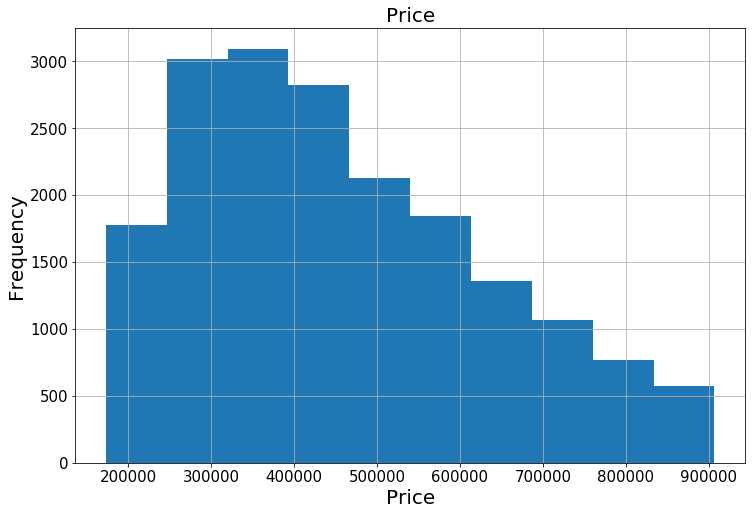

In [7]:
house_df['price'].hist(figsize = (12,8))
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [8]:
print(house_df.head(2))

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   

   price_log  sqft_living_log  
0  12.309982         7.073270  
1  13.195614         7.851661  

[2 rows x 23 columns]


In [9]:
house_df.dtypes

id                          int64
date               datetime64[ns]
price                     float64
bedrooms                    int64
bathrooms                 float64
sqft_living                 int64
sqft_lot                    int64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
yr_built                    int64
yr_renovated                int64
zipcode                     int64
lat                       float64
long                      float64
sqft_living15               int64
sqft_lot15                  int64
price_log                 float64
sqft_living_log           float64
dtype: object

In [10]:
#house_df = house_df.sort_index(inplace=True)

In [11]:
house_df.index = house_df['date']

In [12]:
def plot_ts(ts, lab = ''):
    plt.figure(figsize=(10, 4)).gca()
    ts.plot()
    plt.title('Time series plot of ' + lab, fontsize = 20)
    plt.ylabel('Value', fontsize = 15)
    plt.xlabel('Date', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)           
    plt.grid(True)

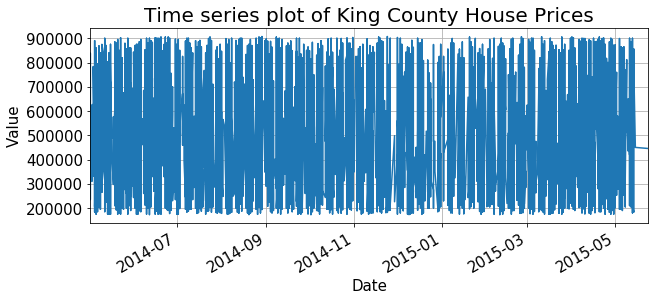

In [13]:
plot_ts(house_df['price'], 'King County House Prices')

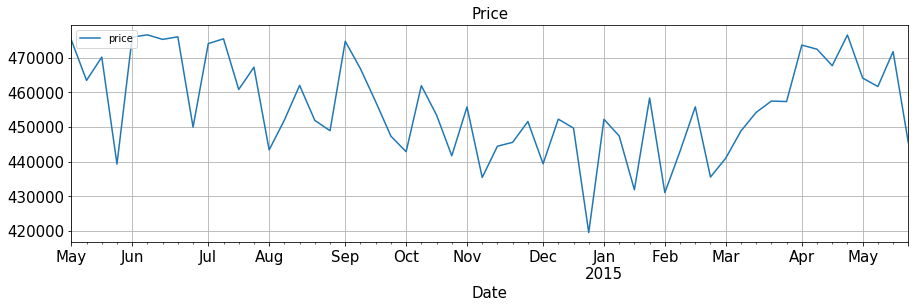

In [14]:
#Time series plot for Price
#To minimize the noise each data point seen here is the mean of a 2 Weeks sample
house_df[["price"]].resample("1W").mean().plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Price',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

In [15]:
house_df.sort_index(inplace= True)

In [16]:
#def decomp_ts(ts, freq = 'M', model = 'additive'):
def decomp_ts(ts, period, model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model, period = period) #, freq = freq)
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

In [17]:
#weekly_data = house_df[["price"]].resample("1W").mean()

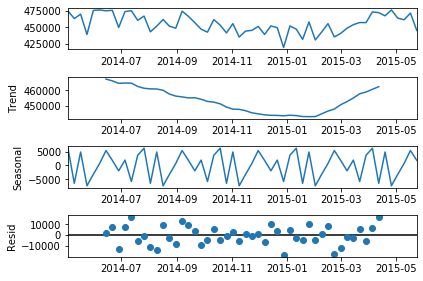

In [18]:
price_decom = decomp_ts(house_df[["price"]].resample("1W").mean(), period = 12)

In [19]:
#price_decom_all = decomp_ts(house_df['price'], period = 12)

In [20]:
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))

DF_Test(price_decom.resid[6:-6])   

D-F statistic = -5.168772080479776
p-value = 1.0178814042569111e-05
number of lags used = 5
Critical value at 5% confidence = -2.941262357486514
Critical value at 10% confidence = -2.6091995013850418


In [21]:
#house_df.head(12)

In [22]:
#house_df.tail(12)

In [23]:
#splt.plot_acf(price_decom['1995-07-01':'2013-06-01'].resid, lags = 40)
#splt.plot_pacf(price_decom['1995-07-01':'2013-06-01'].resid, lags = 40)

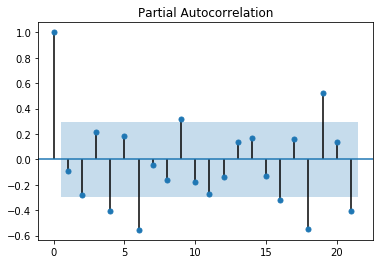

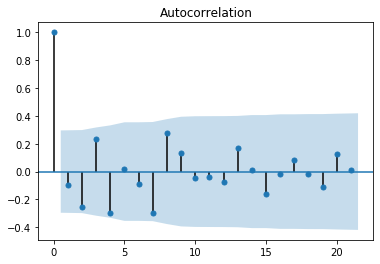

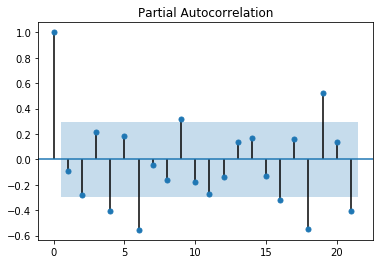

In [24]:
splt.plot_acf(price_decom.resid[6:-6], lags = 21)
splt.plot_pacf(price_decom.resid[6:-6], lags = 21)

## Time Series Model

In [25]:
#from scipy.stats import zscore
#Normalizing values
#lactose.loc[:, ['Month_Cnt', 'Month_Cnt2']] = lactose.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)

In [26]:
house_df['Month'] = house_df['date'].dt.strftime('%b')
#house_df['Month'].unique()
##Create dummy variables for the months
unique_years = house_df['date'].dt.strftime('%Y').unique()
dummies = pd.get_dummies(house_df.loc[:, 'Month'])
house_df[list(dummies.columns)] = dummies

In [27]:
house_df['month_year'] = house_df['date'].dt.strftime('%b-%Y')

count = 1
names = house_df['month_year']
listofcounts = [1]
for i in range(len(names)):
    if i == len(names) - 1:
      break
    elif names[i] == names[i+1]:
        listofcounts.append(count)
    else:
        count = count + 1
        listofcounts.append(count)  

house_df['Month_Cnt'] = listofcounts
house_df['Month_Cnt2'] = [x**2 for x in house_df.Month_Cnt]

In [28]:
house_df['Daily'] = house_df[["price"]].resample("2W").mean()
house_df = house_df.dropna()
house_df.loc[:, 'Day_Cnt'] = [float(i + 1) for i in range(len(house_df.price))]
house_df.loc[:, 'Day_Cnt2'] = [x**2 for x in house_df.Day_Cnt]

from scipy.stats import zscore
house_df.loc[:, ['Day_Cnt', 'Day_Cnt2']] = house_df.loc[:, ['Day_Cnt', 'Day_Cnt2']].apply(zscore)

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
#Daily = house_df[["price"]].resample("1W").mean()
#Daily['MonthNum'] = Daily.index.month
#look_up = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May',
#            6: 'Jun', 7: 'Jul', 8: 'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'}
#Daily['Months'] = Daily['MonthNum'].apply(lambda x: look_up[x])
#Daily = Daily.dropna()
#Daily.loc[:, 'Day_Cnt'] = [float(i + 1) for i in range(len(Daily.price))]
#Daily.loc[:, 'Day_Cnt2'] = [x**2 for x in Daily.Day_Cnt]
#dummies2 = pd.get_dummies(Daily.loc[:, 'Months'])
#Daily[list(dummies.columns)] = dummies2
#from scipy.stats import zscore
#Daily.loc[:, ['Day_Cnt', 'Day_Cnt2']] = Daily.loc[:, ['Day_Cnt', 'Day_Cnt2']].apply(zscore)

#import sklearn.linear_model as lm
#X = Daily.loc[:, ['Day_Cnt', 'Day_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
#Y = Daily.loc[:, 'price'].as_matrix()
#lm_mod = lm.LinearRegression(fit_intercept = False)
#mod_fit = lm_mod.fit(X, Y)

In [30]:
import sklearn.linear_model as lm
#X = house_df.loc[:, ['Month_Cnt','Month_Cnt2','Day_Cnt', 'Day_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
X = house_df.loc[:, ['Day_Cnt', 'Day_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
#X = house_df.loc[:, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = house_df.loc[:, 'Daily'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [31]:
## and the predictions and the residual
house_df.loc[:,'scores'] = mod_fit.predict(X)

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
house_df.loc[:, 'resids'] = house_df.loc[:, 'scores'] - house_df.loc[:, 'price']

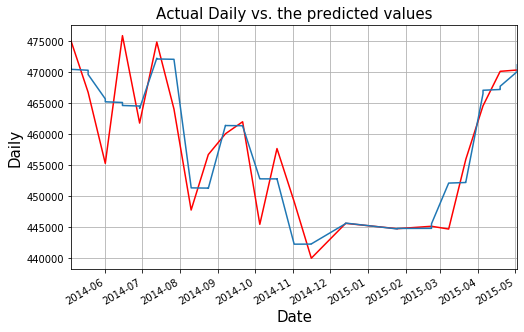

In [33]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values', fontsize = 15) # Give the plot a main title
    ax.set_xlabel('Date',fontsize = 15) # Set text for the x axis
    ax.set_ylabel(col,fontsize = 15)# Set text for y axis
    ax.grid(True) 

plot_mod_fit(house_df, 'Daily')   

In [34]:
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
#X = house_df.loc['2012-12-01':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
rmse_value = RMSE(house_df.loc[:, 'Daily'].as_matrix(), mod_fit.predict(X))

print('The RMSE Value for the Price regression is '+ str(rmse_value))

The RMSE Value for the Price regression is 68.37023572773703


C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [35]:
Price = house_df['Daily']
Prediction_price = house_df['scores']

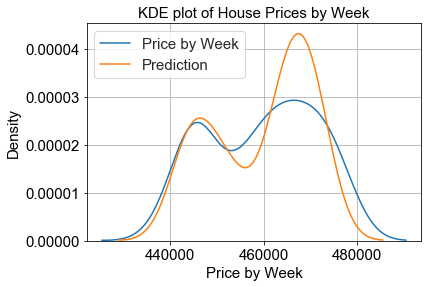

In [36]:
#Kernel Density Estimation Plots (to take a look at the Distribution for each of the variables)
import seaborn as sns
def kde_plot(a,b,c,d,e):
    fig = plt.figure(figsize=(6,4)) # Define plot area
    ax = fig.gca() # Define axis 
    sns.set_style("whitegrid")
    sns.kdeplot(a, ax = ax, label = c)
    sns.kdeplot(b, ax = ax, label = d)
    ax.set_title('KDE plot of ' + e, fontsize = 15) # Give the plot a main title
    ax.set_xlabel('Price by Week', fontsize = 15) # Set text for the x axis
    ax.set_ylabel('Density', fontsize = 15)# Set text for y axis
    ax.legend(loc='upper left', fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True) 
    
kde_plot(Price,Prediction_price,"Price by Week","Prediction","House Prices by Week")

In [37]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)   
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.show()

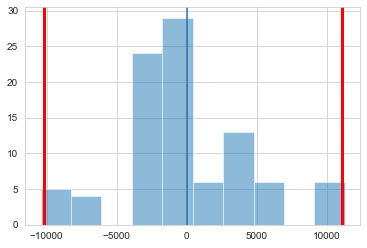

In [38]:
#diffs = pd.Series(diffs)
Delta = Price - Prediction_price
Delta =  pd.Series(Delta)
Delta = Delta.reset_index()
Delta = Delta.iloc[:,1]
#print(Delta)
plot_hist(Delta)

In [39]:
def t_test(a, b, alpha, alternative='two-sided'):
    import statsmodels.stats.weightstats as ws 
    diff = a.mean() - b.mean()
    res = ss.ttest_ind(a, b, equal_var=False)  
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

In [40]:
Price_log = pd.Series(np.log(house_df['Daily']))
Price_log = Price_log.reset_index(drop=True)

Prediction_price_log = pd.Series(np.log(house_df['scores']))
Prediction_price_log = Prediction_price_log.reset_index(drop=True)

In [41]:
t_test(Prediction_price_log,Price_log,0.05)

DegFreedom    182.516541
Difference      0.000051
Statistic       0.014590
PValue          0.988375
Low95CI        -0.006837
High95CI        0.006939
dtype: float64

In [42]:
#A new package is available that could replace model_ARIMA_2 method. The method auto_arima is part of pyramid package. 
#The advantages of this package is that it can omit the errors/warning you might face during the iterative process. 
#For more details on how to use the method, please see documentation at https://www.alkaline-ml.com/pyramid/modules/generated/pyramid.arima.auto_arima.html, 
#and example on how to use at https://www.alkaline-ml.com/pyramid/quickstart.html#
#The code below could replace the code in previous cell: #Step ARIMA to find the best ORDER
#price_summary = pd.Series(house_df['Daily'])

from pmdarima.arima import auto_arima
stepwise_fit = auto_arima(price_decom.resid[6:-6], start_p=1, start_q=1,
#stepwise_fit = auto_arima(price_summary, start_p=1, start_q=1,
                             max_p=3, max_q=3, max_P=3, m=12, #m -> the number of observations per cycle
                             start_P=1, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise


stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=697.260, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=690.275, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=691.503, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=685.887, Time=0.21 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=687.804, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=687.806, Time=0.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=688.347, Time=0.12 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=689.804, Time=0.86 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=683.091, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=694.967, Time=0.07 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=692.152, Time=0.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=691.683, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   44
Model:             SARIMAX(1, 1, 3)x(2, 1, [], 12)   Log Likelihood                -327.042
Date:                             Mon, 15 Feb 2021   AIC                            668.083
Time:                                     13:02:25   BIC                            678.121
Sample:                                          0   HQIC                           671.355
                                              - 44                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0104      0.722     -0.014      0.988      -1.425       1.404
ma.L1         -0.9903      0.579     -1.711      0.087      -2.124       0.144
ma.L2         -0.8196      0.625     -1.311      0.190      -2.045       0.406
ma.L3          0.8587      0.654      1.313      0.189      -0.423       2.140
ar.S.L12      -0.4789      0.407     -1.176      0.240      -1.277       0.320
ar.S.L24      -0.4694      0.316     -1.488      0.137      -1.088       0.149
sigma2      1.106e+08   4.41e-09   2.51e+16      0.000    1.11e+08    1.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.76   Prob(JB):                         0.66
Heteroskedasticity (H):               1.94   Skew:                             0.16
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+33. Standard errors may be unstable.
"""

In [43]:
model_prediction = stepwise_fit.predict(n_periods = house_df.Daily.shape[0])

In [44]:
house_df.loc[:, 'ARIMA_scores'] =  stepwise_fit.predict(n_periods = house_df.Daily.shape[0])

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
house_df.loc[:, 'Final'] = house_df.loc[:, 'ARIMA_scores'] + house_df.loc[:, 'scores']
def plot_mod_fit_temp(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'Final'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values', fontsize = 15) # Give the plot a main title
    ax.set_xlabel('Date',fontsize = 15) # Set text for the x axis
    ax.set_ylabel(col,fontsize = 15)# Set text for y axis
    ax.grid(True)

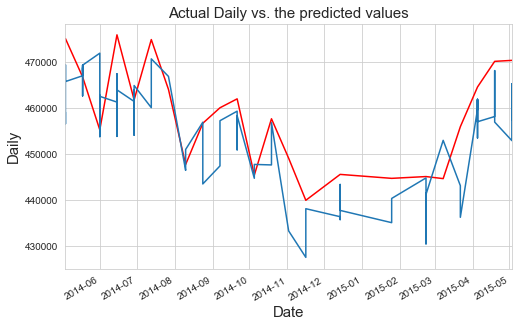

In [46]:
plot_mod_fit_temp(house_df, 'Daily') 